In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
df= pd.read_csv("Final_data-crop_yield (1).csv")
df.head(5)

,Domain,Area,Crop,Year,Unit,Yield,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,Crops and livestock products,Malaysia,"Cocoa, beans",1981,hg/ha,11560,2248.92,17.72,83.40,26.01
1,Crops and livestock products,Malaysia,"Cocoa, beans",1982,hg/ha,11253,1938.42,17.54,82.11,26.11
2,Crops and livestock products,Malaysia,"Cocoa, beans",1983,hg/ha,9456,2301.54,17.81,82.79,26.24
3,Crops and livestock products,Malaysia,"Cocoa, beans",1984,hg/ha,9321,2592.35,17.61,85.07,25.56
4,Crops and livestock products,Malaysia,"Cocoa, beans",1985,hg/ha,8800,2344.72,17.61,84.12,25.76


In [5]:
df.Crop.unique()

array(['Cocoa, beans', 'Oil palm fruit', 'Rice, paddy', 'Rubber, natural'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Domain                                 156 non-null    object 
 1   Area                                   156 non-null    object 
 2   Crop                                   156 non-null    object 
 3   Year                                   156 non-null    int64  
 4   Unit                                   156 non-null    object 
 5   Yield                                  156 non-null    int64  
 6   Precipitation (mm day-1)               156 non-null    float64
 7   Specific Humidity at 2 Meters (g/kg)   156 non-null    float64
 8   Relative Humidity at 2 Meters (%)      156 non-null    float64
 9   Temperature at 2 Meters (C)            156 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 12.3+ KB


In [21]:
df.describe()

,Year,Yield,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,2000.000000,55709.262821,2372.933077,18.203077,84.737692,26.18359
std,11.290876,70741.854157,619.577637,0.293923,0.996226,0.26105
min,1981.000000,542.000000,6.100000,17.540000,82.110000,25.56000
25%,1990.000000,7953.500000,2301.540000,18.030000,84.120000,26.02000
50%,2000.000000,18871.000000,2424.550000,18.270000,84.850000,26.13000
75%,2010.000000,67518.750000,2718.080000,18.400000,85.510000,26.30000
max,2019.000000,203399.000000,3085.790000,18.700000,86.100000,26.81000


<AxesSubplot:xlabel='Year', ylabel='Yield'>

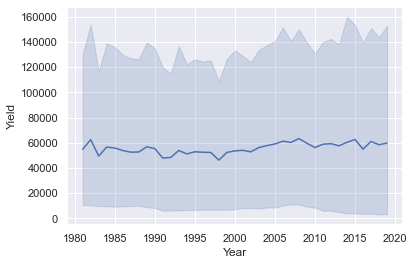

In [17]:
sns.set_theme()
sns.lineplot(data= df, x="Year", y="Yield")

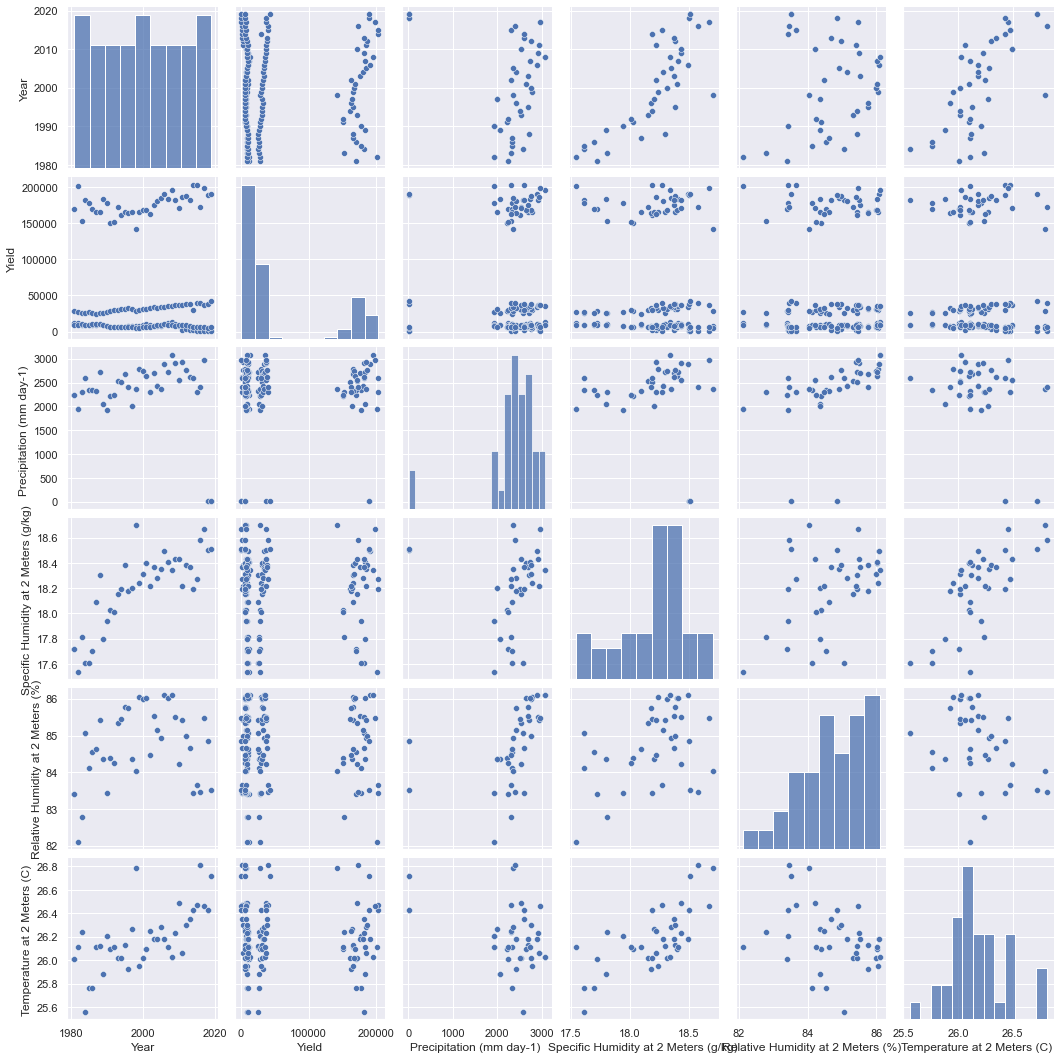

In [25]:
sns.pairplot(df)

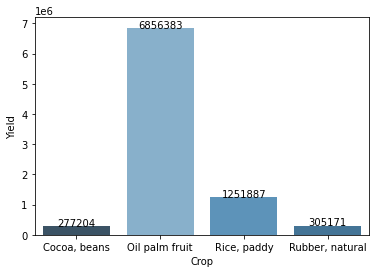

In [18]:
grouped_v = df.groupby('Crop').sum().reset_index()

pal = sns.color_palette("Blues_d", len(grouped_v))
rank = grouped_v["Yield"].argsort().argsort() 
g=sns.barplot(x='Crop',y='Yield',data=grouped_v, palette=np.array(pal[::-1])[rank])

for index, row in grouped_v.iterrows():
    g.text(row.name,row.Yield, round(row.Yield,2), color='black', ha="center")

plt.show()

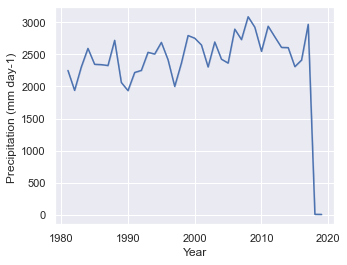

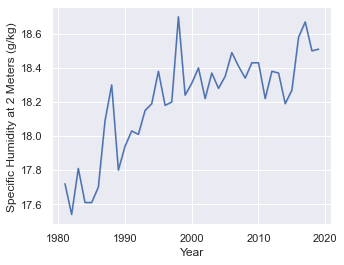

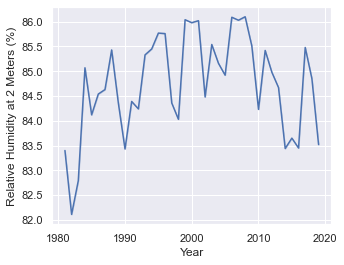

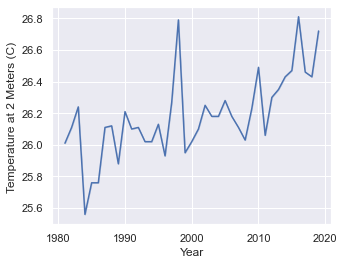

In [48]:
# Change of Weather over the years
fig, ax = plt.subplots(figsize=(5,4))
sns.set_theme()
ax = sns.lineplot(data = df, x="Year", y="Precipitation (mm day-1) ")
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data = df, x="Year", y="Specific Humidity at 2 Meters (g/kg) ")
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data = df, x="Year", y="Relative Humidity at 2 Meters (%)")
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data = df, x="Year", y="Temperature at 2 Meters (C) ")

In [50]:
# Visualize the relationship of weather and yield for different crop types 
def v_croptype_yield(data):
    fig, ax = plt.subplots(figsize=(5,4))
    sns.set_theme()
    ax = sns.lineplot(data = data, x="Precipitation (mm day-1) ", y="Yield")
    fig, ax = plt.subplots(figsize=(5,4))
    ax = sns.lineplot(data = data, x="Specific Humidity at 2 Meters (g/kg) ", y="Yield")
    fig, ax = plt.subplots(figsize=(5,4))
    ax = sns.lineplot(data = data, x="Relative Humidity at 2 Meters (%)", y="Yield")
    fig, ax = plt.subplots(figsize=(5,4))
    ax = sns.lineplot(data =data, x="Temperature at 2 Meters (C) ", y="Yield")


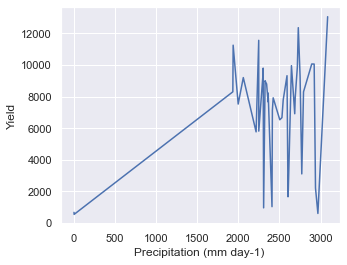

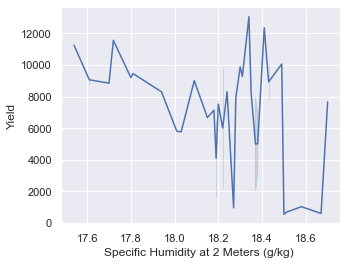

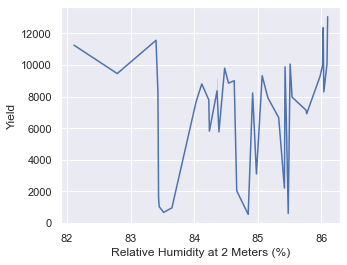

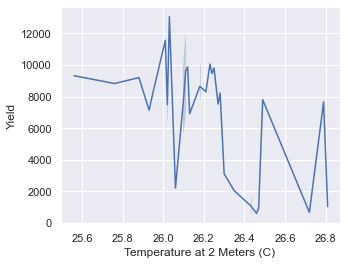

In [51]:
v_croptype_yield(df[df['Crop']=='Cocoa, beans'])

In [52]:
df['Crop'].unique()

array(['Cocoa, beans', 'Oil palm fruit', 'Rice, paddy', 'Rubber, natural'],
      dtype=object)

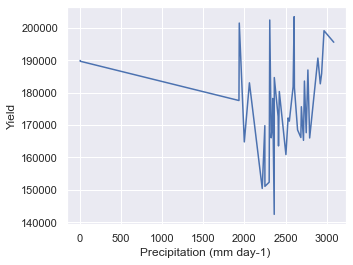

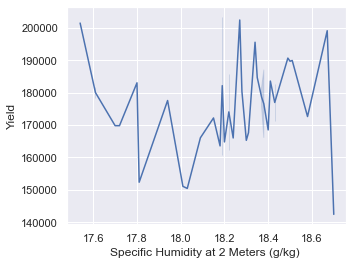

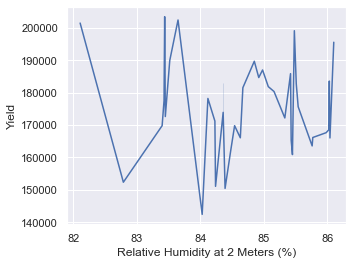

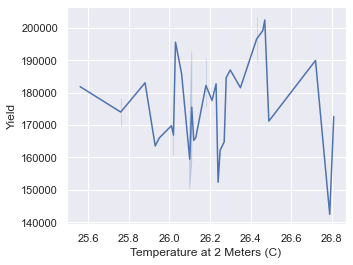

In [53]:
v_croptype_yield(df[df['Crop']=='Oil palm fruit'])

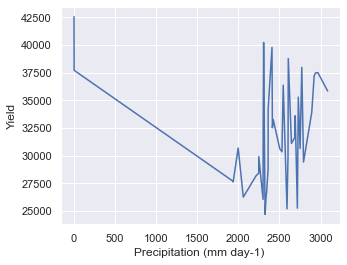

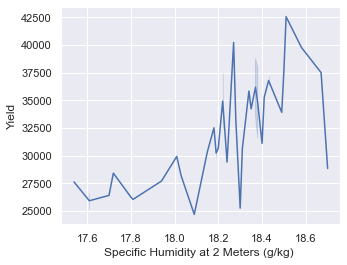

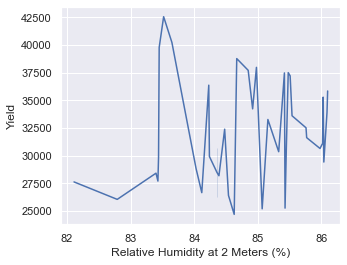

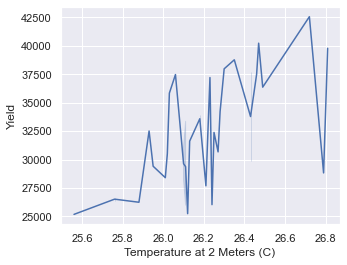

In [54]:
v_croptype_yield(df[df['Crop']=='Rice, paddy'])

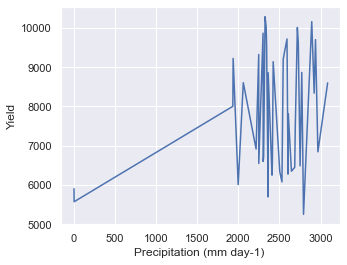

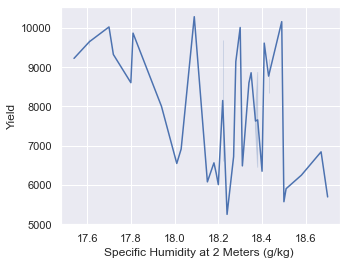

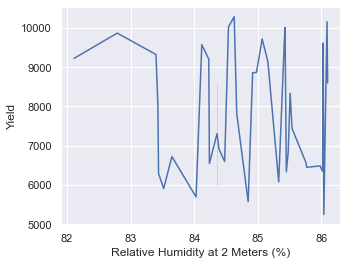

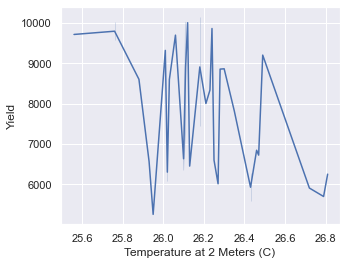

In [55]:
v_croptype_yield(df[df['Crop']=='Rubber, natural'])